In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [78]:
data = pd.read_csv('02_housing.csv', header=0)
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [79]:
print(data.shape)
data.describe()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Exploratory data analysis

<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

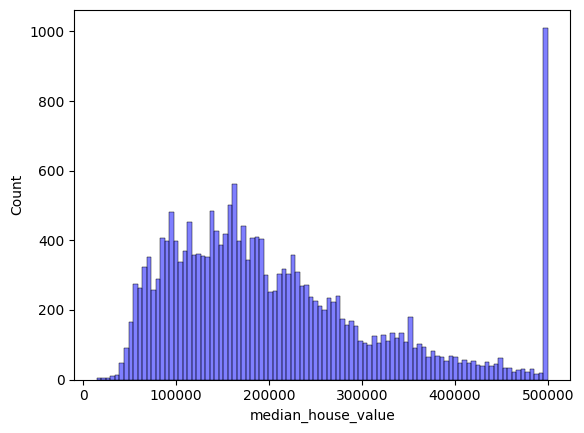

In [80]:
#fig, ax =  plt.subplots()
sns.histplot(data['median_house_value'], bins=100, color='blue', alpha=0.5)#, ax=ax)
#sns.histplot(data['median_house_value']+200000, bins=100, color='red', alpha=0.5)#, ax=ax)

<AxesSubplot: ylabel='Count'>

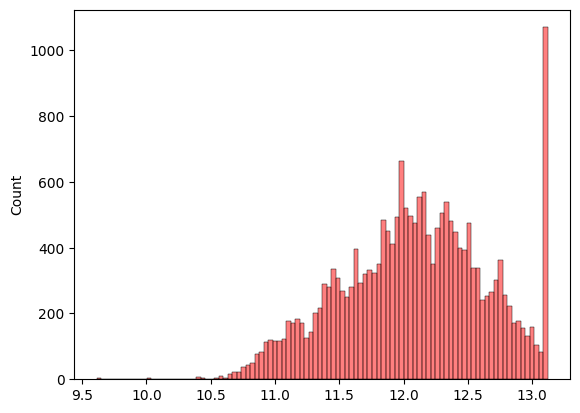

In [81]:
sns.histplot(np.log1p(data['median_house_value'].values), bins=100, color='red', alpha=0.5)#, ax=ax)

# median house value does have long tail problem. But it does not very long. Even then it is good to use logarithm of it

In [82]:
cols_needed = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

data = data[cols_needed]
data.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41,880,129.0,322,126,8.3252,452600
1,37.86,-122.22,21,7099,1106.0,2401,1138,8.3014,358500
2,37.85,-122.24,52,1467,190.0,496,177,7.2574,352100
3,37.85,-122.25,52,1274,235.0,558,219,5.6431,341300
4,37.85,-122.25,52,1627,280.0,565,259,3.8462,342200


In [83]:
data.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## total_bedrooms contain 207 null values

In [84]:
np.random.seed(42)
rand_idx = list(data.index)
print(rand_idx[0:10])
np.random.shuffle(rand_idx)
print(rand_idx[0:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[20046, 3024, 15663, 20484, 9814, 13311, 7113, 7668, 18246, 5723]


In [85]:
len_train = int(0.6 * data.shape[0])
len_val = int(0.2 * data.shape[0])

x_train = data.loc[rand_idx[0:len_train]]
y_train = x_train['median_house_value']
y_train = np.log1p(y_train)
x_train.drop('median_house_value', axis=1, inplace=True)

x_val = data.loc[rand_idx[len_train:len_train+len_val]]
y_val = x_val['median_house_value']
y_val = np.log1p(y_val)
x_val.drop('median_house_value', axis=1, inplace=True)

x_test = data.loc[rand_idx[len_train+len_val:]]
y_test = x_test['median_house_value']
y_test = np.log1p(y_test)
x_test.drop('median_house_value', axis=1, inplace=True)

print(x_train.columns)
print(data.shape, y_train.shape, y_val.shape, y_test.shape)

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')
(20640, 9) (12384,) (4128,) (4128,)


In [128]:
print(x_train.isna().sum())
print(x_val.isna().sum())
print(x_test.isna().sum())

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        128
population              0
households              0
median_income           0
dtype: int64
latitude               0
longitude              0
housing_median_age     0
total_rooms            0
total_bedrooms        32
population             0
households             0
median_income          0
dtype: int64
latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [129]:
def prepare_data(input, apply_zero = True):
    data = input.copy()
    
    fill_val = 0
    if not apply_zero:
        fill_val = data['total_bedrooms'].mean()
    data['total_bedrooms'] = data['total_bedrooms'].fillna(fill_val)

    return data

def train_regression(x, y):
    one_val = np.ones(x.shape[0])
    x = np.column_stack((one_val, x))
    xtx = x.T.dot(x)
    xtx_inv = np.linalg.inv(xtx)

    w_full = xtx_inv.dot(x.T).dot(y)

    return w_full[0], w_full[1:]

def rmse(y_act, y_pred, round_val=None):
    temp = np.square(y_act - y_pred)
    vari = np.average(temp)
    std = np.sqrt(vari)
    if round_val:
        std = std.round(round_val)
    return std

def predict(x, w0, w):
    result = w0 + x.dot(w)
    
    return result


In [131]:
print(prepare_data(x_train, apply_zero=True)['total_bedrooms'].sum())
print(prepare_data(x_train, apply_zero=False)['total_bedrooms'].sum())

print(prepare_data(x_val, apply_zero=True)['total_bedrooms'].sum())
print(prepare_data(x_val, apply_zero=False)['total_bedrooms'].sum())

6564938.0
6633501.321148824
2197970.0
2215141.640625


In [132]:
w0_zero, w_zero = train_regression(prepare_data(x_train, apply_zero=True).values, y_train.values)
x_val_zero = prepare_data(x_val, apply_zero=True).values
zero_val_pred = predict(x_val_zero, w0_zero, w_zero)
print(rmse(y_val, zero_val_pred, round_val=2))
#print(w0_zero, w_zero)

w0_mean, w_mean = train_regression(prepare_data(x_train, apply_zero=False).values, y_train.values)
mean_val_pred = predict(x_val_zero, w0_mean, w_mean)
print(rmse(y_val, mean_val_pred, round_val=2))
#print(w0_mean, w_mean)

0.34
0.34


## Applying mean or zero has the same results

In [133]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    temp = prepare_data(x_train, apply_zero=True).values
    temp = temp + r * np.eye(temp.shape[0], temp.shape[1])
    #print(temp.sum().sum())
    w0_zero, w_zero = train_regression(temp, y_train.values)
    x_val_zero = prepare_data(x_val, apply_zero=True).values
    zero_val_pred = predict(x_val_zero, w0_zero, w_zero)
    print(f'Score for regularization with {r} value is {rmse(y_val, zero_val_pred, round_val=2)}')

Score for regularization with 0 value is 0.34
Score for regularization with 1e-06 value is 0.34
Score for regularization with 0.0001 value is 0.34
Score for regularization with 0.001 value is 0.34
Score for regularization with 0.01 value is 0.34
Score for regularization with 0.1 value is 0.34
Score for regularization with 1 value is 0.34
Score for regularization with 5 value is 0.34
Score for regularization with 10 value is 0.34


# Different regularization also did not have any difference in imapct

In [137]:
scores = []
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    rand_idx = list(data.index)
    np.random.shuffle(rand_idx)

    len_train = int(0.6 * data.shape[0])
    len_val = int(0.2 * data.shape[0])

    x_train = data.loc[rand_idx[0:len_train]]
    y_train = x_train['median_house_value']
    y_train = np.log1p(y_train)
    x_train.drop('median_house_value', axis=1, inplace=True)

    x_val = data.loc[rand_idx[len_train:len_train+len_val]]
    y_val = x_val['median_house_value']
    y_val = np.log1p(y_val)
    x_val.drop('median_house_value', axis=1, inplace=True)

    temp = prepare_data(x_train, apply_zero=True).values
    temp = temp + 0.0 * np.eye(temp.shape[0], temp.shape[1])

    w0, w = train_regression(temp, y_train.values)
    x_val_zero = prepare_data(x_val, apply_zero=True).values
    pred_val = predict(x_val_zero, w0, w)

    #print(w0, w, pred_val)

    score = rmse(y_val, pred_val, round_val=None)
    scores.append(score)
    print(f'Score for Seed with {seed} value is {score}')

print('Std. deviation of scores - ', np.std(scores).round(3))


Score for Seed with 0 value is 0.33884304805312637
Score for Seed with 1 value is 0.33623872559560086
Score for Seed with 2 value is 0.33209123188346257
Score for Seed with 3 value is 0.3405153609032864
Score for Seed with 4 value is 0.33890240665741866
Score for Seed with 5 value is 0.3434866725719319
Score for Seed with 6 value is 0.34519809531013984
Score for Seed with 7 value is 0.33959899274099736
Score for Seed with 8 value is 0.3466230873193225
Score for Seed with 9 value is 0.33659261241764615
Std. deviation of scores -  0.004


# The model is stable

In [157]:
np.random.seed(9)
rand_idx = list(data.index)
np.random.shuffle(rand_idx)

len_train = int(0.6 * data.shape[0])
len_val = int(0.2 * data.shape[0])

x_train = data.loc[rand_idx[0:len_train]]
y_train = x_train['median_house_value']
y_train = np.log1p(y_train)
x_train.drop('median_house_value', axis=1, inplace=True)

x_val = data.loc[rand_idx[len_train:len_train+len_val]]
y_val = x_val['median_house_value']
y_val = np.log1p(y_val)
x_val.drop('median_house_value', axis=1, inplace=True)

x_test = data.loc[rand_idx[len_train+len_val:]]
y_test = x_test['median_house_value']
y_test = np.log1p(y_test)
x_test.drop('median_house_value', axis=1, inplace=True)

x_train = pd.concat([x_train, x_val])
y_train = pd.concat([y_train, y_val])

temp = prepare_data(x_train, apply_zero=True).values
temp = temp + 0.001 * np.eye(temp.shape[0], temp.shape[1])

w0, w = train_regression(temp, y_train.values)

temp = prepare_data(x_test, apply_zero=True).values
pred_test = predict(temp, w0, w)

#print(w0, w, pred_test)

score = rmse(y_test, pred_test, round_val=None)
scores.append(score)
print(f'Test Score for Seed 9 with regularizaton 0.001 is {score}')

Test Score for Seed 9 with regularizaton 0.001 is 0.34531495230811216
